In [1]:
# %matplotlib qt 

# %matplotlib inline

import typing as T
import numpy as np
from matplotlib import pyplot as plt
from util import timeit, YAY, INFO, ERROR, WARN

from gcs_as_a_policy import plot_policy_realizations_from_state, make_a_path_from_policy
from gcs_as_a_policy import LEAST_SQUARES_POLICY, QP_POLICY
from good_LQR_unit_test import make_a_simple_lqr_test
from mpc_test import make_a_simple_mpc_test, make_a_bigger_mpc_test

def state(x,y):
    return np.array([x,0,y,0])

dt = 0.2
# initial_states = [ state(5,5.5), state(5.5,5), state(4.5,5.5), state(5.5,4.5)] #, state(3.9,5.5), state(5.5,3.9) ]
initial_states = [ state(5.5,5), state(4.5,5.5), state(5.5,4.5)] #, state(3.5 ,5.5), state(5.5,3.5) ]
xlim = [0,6]
ylim = [0,6]
N = 15

0.686s since last time-check
SolutionResult.kSolutionFound
[3879.64, 4060.13, 4060.13]


/var/folders/cs/wsm1pbzn3j38htj46lqxff4m0000gn/T/ipykernel_50283/2967869706.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


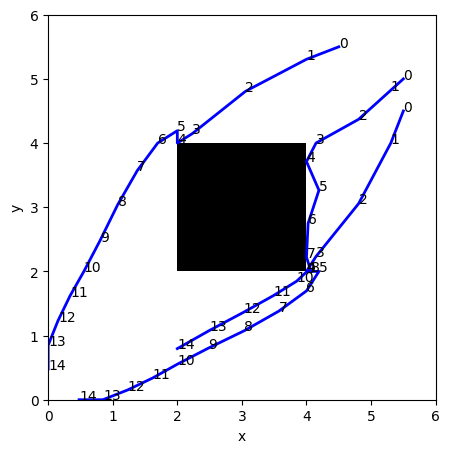

In [4]:
# make more sets
# what are the costs incurred by each policy?

vertices, edges, solution = make_a_bigger_mpc_test(N = N, verbose = False, dt = dt)
fig, ax, costs = plot_policy_realizations_from_state(vertices, edges, solution, initial_states, QP_POLICY, False, xlim, ylim)
YAY(costs)
fig.show()




0.370s since last time-check
SolutionResult.kSolutionFound
[4101.056, 3359.447, 4282.804]


/var/folders/cs/wsm1pbzn3j38htj46lqxff4m0000gn/T/ipykernel_49893/1893748284.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


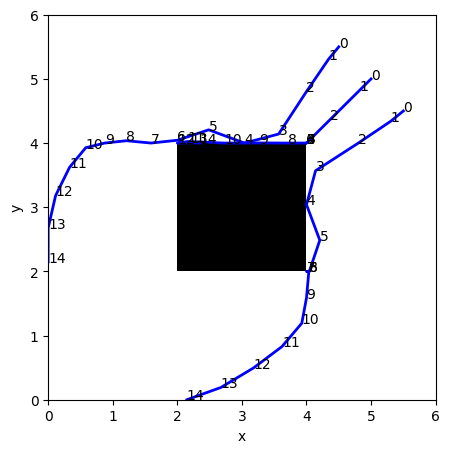

In [9]:
# make more sets
# what are the costs incurred by each policy?

vertices, edges, solution = make_a_bigger_mpc_test(N = N, verbose = False, dt = dt, dumb_policy=True)
fig, ax, costs = plot_policy_realizations_from_state(vertices, edges, solution, initial_states, QP_POLICY, True, xlim, ylim)
YAY(costs)
fig.show()




0.751s since last time-check
SolutionResult.kSolutionFound
[3426.221, 3308.303, 3308.303]


/var/folders/cs/wsm1pbzn3j38htj46lqxff4m0000gn/T/ipykernel_50283/2418424106.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


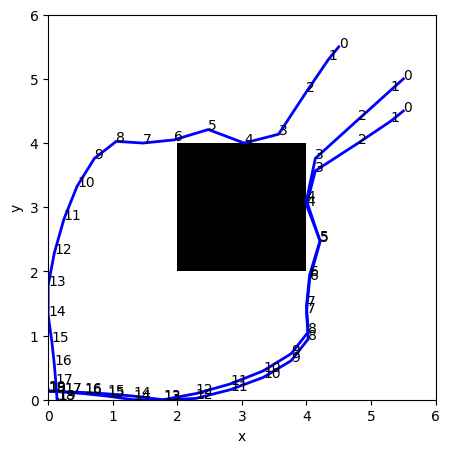

In [2]:
# make more sets
# what are the costs incurred by each policy?

vertices, edges, solution = make_a_simple_mpc_test(N = 20, verbose = False, dt = dt)
fig, ax, costs = plot_policy_realizations_from_state(vertices, edges, solution, initial_states, QP_POLICY, False, xlim, ylim)
YAY(costs)
fig.show()




0.257s since last time-check
SolutionResult.kSolutionFound
[2941.909, 2806.303, 4535.172]


/var/folders/cs/wsm1pbzn3j38htj46lqxff4m0000gn/T/ipykernel_50283/698195003.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


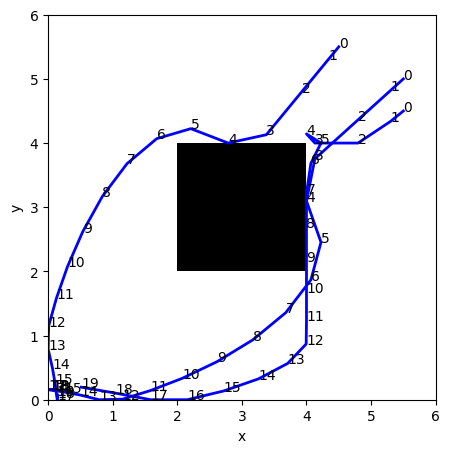

In [3]:
vertices, edges, solution = make_a_simple_mpc_test(N = 20, verbose = False, dt = dt, dumb_policy=True)
fig, ax, costs = plot_policy_realizations_from_state(vertices, edges, solution, initial_states, QP_POLICY, True, xlim, ylim)
YAY(costs)
fig.show()

0.016s since last time-check
Passed LQR test implemented by substituting the dynamics


/var/folders/cs/wsm1pbzn3j38htj46lqxff4m0000gn/T/ipykernel_44934/1576905056.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


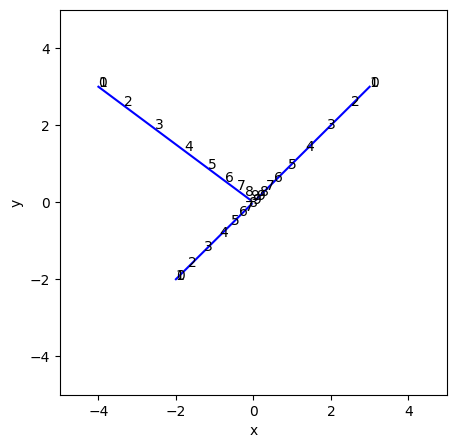

In [4]:
vertices, edges, solution = make_a_simple_lqr_test(10, False, 0.5)
initial_states = [ state(3,3), state(-4,3), state(-2,-2) ]
fig, ax = plot_policy_realizations_from_state(vertices, edges, solution, initial_states, LEAST_SQUARES_POLICY)
fig.show()

0.250s since last time-check
SolutionResult.kSolutionFound


TypeError: _amax_dispatcher() got multiple values for argument 'axis'